In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("SATILIK_EV1.xlsx")
df.head()

,Unnamed: 0,Fiyat,Oda_Sayısı,Net_m2,Katı,Yaşı
0,0,475,1,40,0,6
1,1,475,1,55,0,5
2,2,450,1,50,0,7
3,3,450,1,55,1,6
4,4,475,1,45,2,7


In [3]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
X = df[['Oda_Sayısı','Net_m2','Katı','Yaşı']]
y = df['Fiyat']

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
lasso = Lasso(random_state=42)
parametreler = {'alpha':[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,2,3,4,5,10,20,30,50]}

In [8]:
lasso_GS = GridSearchCV(lasso,parametreler,scoring='r2',cv=5)

In [11]:
lasso_GS.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   2, 3, 4, 5, 10, 20, 30, 50]},
             scoring='r2')

In [12]:
lasso_GS.best_params_

{'alpha': 1}

In [13]:
lasso_GS.best_estimator_

Lasso(alpha=1, random_state=42)

In [14]:
lasso_GS.best_score_

0.7070875030803956

## Cros-Validation

In [15]:
all_accuracies = cross_val_score(estimator=lasso_GS.best_estimator_,X=x_train,y=y_train,cv = 5)

In [16]:
all_accuracies

array([0.59123045, 0.86153674, 0.75880023, 0.58955277, 0.73431731])

In [17]:
print(all_accuracies.mean())
print(all_accuracies.std())

0.7070875030803956
0.10441025340335004


In [18]:
oznitelik_katsayıları = pd.DataFrame(lasso_GS.best_estimator_.coef_,X.columns)
oznitelik_katsayıları

,0
Oda_Sayısı,103.407284
Net_m2,1.619248
Katı,7.086422
Yaşı,-4.055176


In [19]:
lasso_train_score = lasso_GS.best_estimator_.score(x_train,y_train)
lasso_test_score = lasso_GS.best_estimator_.score(x_test,y_test)

In [20]:
lasso_train_score

0.7324650909211012

In [21]:
lasso_test_score

0.686290674561939

In [22]:
df['Predict'] = lasso_GS.best_estimator_.predict(X)

In [23]:
df[['Fiyat','Predict']].head(10)

,Fiyat,Predict
0,475,434.584450
1,475,462.928338
2,450,446.721749
3,450,465.959585
4,475,452.798357
5,475,458.873162
6,475,471.024575
7,475,446.721749
8,450,454.817987
9,475,452.812470


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


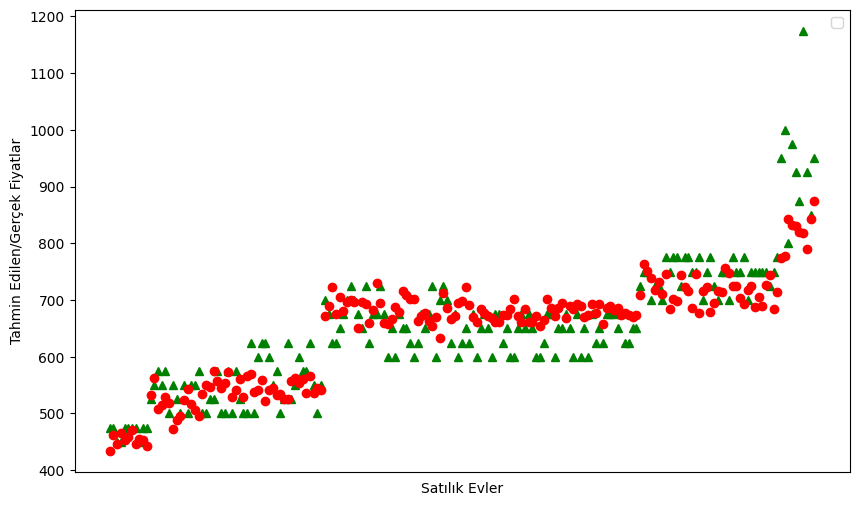

In [24]:
plt.figure(figsize=(10,6))
plt.xticks(df['Fiyat'],df.index.values)
plt.plot(df['Fiyat'],'g^')
plt.xticks(df['Predict'],df.index.values)
plt.plot(df['Predict'],'ro')
plt.xlabel('Satılık Evler')
plt.ylabel('Tahmin Edilen/Gerçek Fiyatlar')
plt.legend(loc='best')
plt.show()

In [25]:
oda_sayısı = 3
net_m2 = 105
kat=4
yas=8

lasso_GS.best_estimator_.predict([[oda_sayısı,net_m2,kat,yas]])

array([766.88544391])